### The Libraries we need:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)

### Data segmentation

In [2]:
with open("data.txt",'r') as d:
    N = []
    X = []
    Y = []
    MUMAX = []
    MAG = []
###################################################################################################################
    for line in d:
        l = line.split()
        n,x,y,mumax,mag = int(l[0]),float(l[1]),float(l[2]),float(l[3]),float(l[4])
###Object_index:
        N.append(n)
###Object_X_Position:
        X.append(x)
###Object_Y_Position:
        Y.append(y)
###Object_MU_MAX:
        MUMAX.append(mumax)
###Object_Magnitude:
        MAG.append(mag)
###################################################################################################################

In [3]:
NP = len(N)
NP

258

### Galaxy/Stars distinction

### Brightness Cut_off

In [4]:
Cut_off = []
Ratio = []
ss=0
c1=0
c2=0
c3=0
c4=0
for i1 in MUMAX:
    ss+=1
    if (i1 > (-13)):
        Cut_off.append(ss)

### Brightness/Magnitude Criterion

In [5]:
for k in MUMAX:           
    c2+=1
    c3=0
    for j in MAG:
        c3+=1
        if ((c2 == c3) and (c3 in Cut_off)):
            if ((k/j) < 0.94):
                Ratio.append(c3)

In [6]:
Star_MUMAX=[]
Star_MAG=[]
Glag_MUMAX=[]
Glag_MAG=[]
XS=[]
XG=[]
YS=[]
YG=[]
for i3 in N:
    if i3 in Ratio:
        Glag_MUMAX.append(MUMAX[i3-1])
        Glag_MAANgulartwopointcorrelationfunction.pyG.append(MAG[i3-1])
        XG.append(X[i3-1])
        YG.append(Y[i3-1])
    else:
        Star_MUMAX.append(MUMAX[i3-1])
        Star_MAG.append(MAG[i3-1])
        XS.append(X[i3-1])
        YS.append(Y[i3-1])
NPS = len(Star_MUMAX)
NPG = len(Glag_MUMAX)

In [7]:
Galaxy_Signals_Ratio = (NPG/NP)
print('Galaxy_Signals_Ratio:',Galaxy_Signals_Ratio)
Star_Signals_Ratio = (NPS/NP)
print('Star_Signals_Ratio:',Star_Signals_Ratio)

Galaxy_Signals_Ratio: 0.12015503875968993
Star_Signals_Ratio: 0.8798449612403101


### Visualization

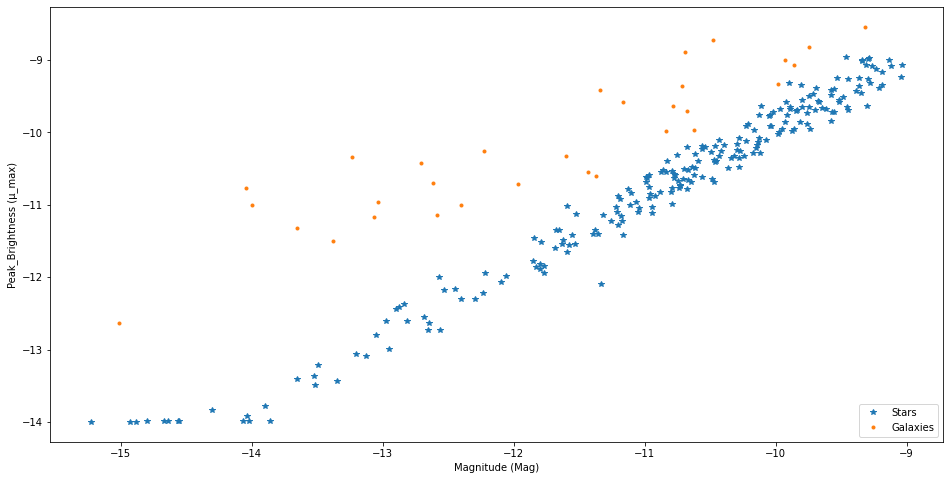

In [8]:
plt.plot(Star_MAG,Star_MUMAX,'*',label='Stars')
plt.plot(Glag_MAG,Glag_MUMAX,'.',label='Galaxies')
plt.xlabel('Magnitude (Mag)')
plt.ylabel('Peak_Brightness (µ_max)')
plt.legend(loc='lower right')
plt.draw()
plt.savefig('object_separation.pdf')

### Creation of Random Data On the same frame with The Astrophysical Data

### All_of_Data

In [9]:
X1 = np.random.uniform(low=0, high=1024, size=(NP,))
Y1 = np.random.uniform(low=0, high=1024, size=(NP,))
X2 = X
Y2 = Y

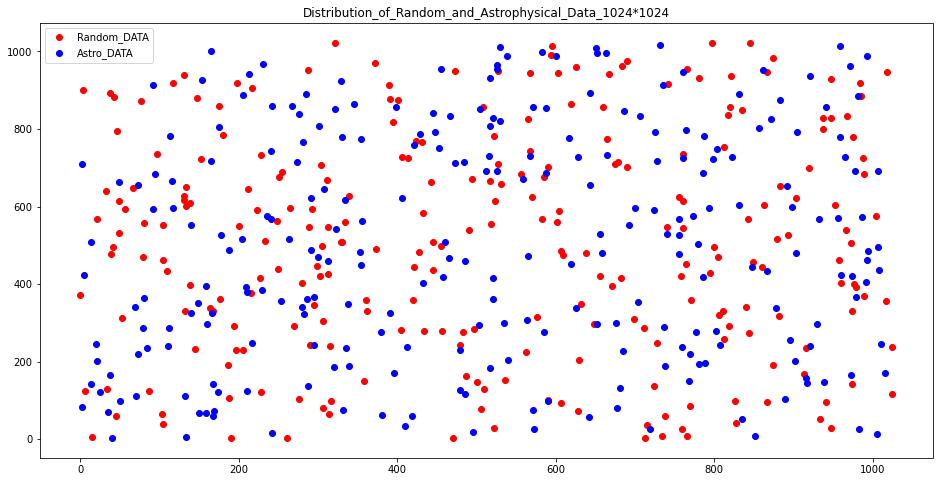

In [10]:
plt.scatter(X1,Y1,c='r',label='Random_DATA')
plt.scatter(X2,Y2,c='b',label='Astro_DATA')
plt.title("Distribution_of_Random_and_Astrophysical_Data_1024*1024")
plt.legend()
plt.draw()
plt.savefig('1024*1024_visualization.pdf')

### Separated Astral Objects

### Stars

In [11]:
XS1 = np.random.uniform(low=0, high=1024, size=(NPS,))
YS1 = np.random.uniform(low=0, high=1024, size=(NPS,))
XS2 = XS
YS2 = YS

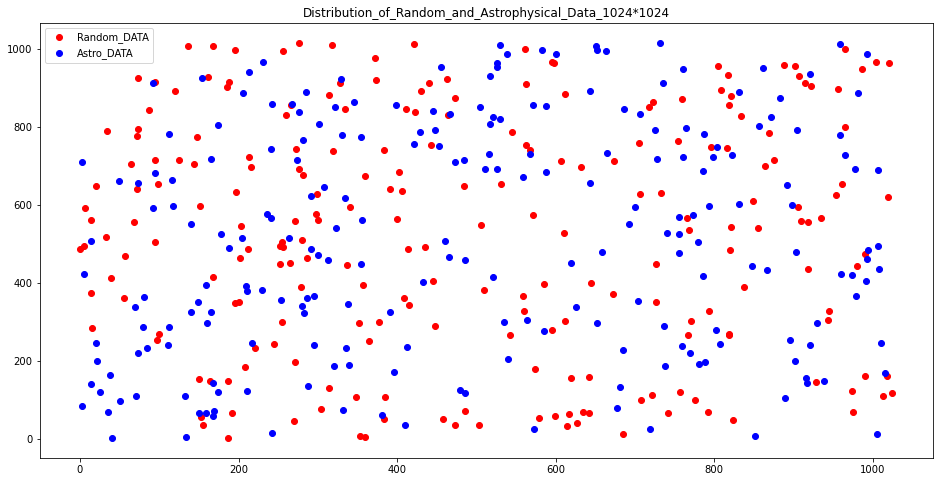

In [12]:
plt.scatter(XS1,YS1,c='r',label='Random_DATA')
plt.scatter(XS2,YS2,c='b',label='Astro_DATA')
plt.title("Distribution_of_Random_and_Astrophysical_Data_1024*1024")
plt.legend()
plt.draw()
plt.savefig('1024*1024_visualization_Star.pdf')

### Galaxies

In [13]:
XG1 = np.random.uniform(low=0, high=1024, size=(NPG,))
YG1 = np.random.uniform(low=0, high=1024, size=(NPG,))
XG2 = XG
YG2 = YG

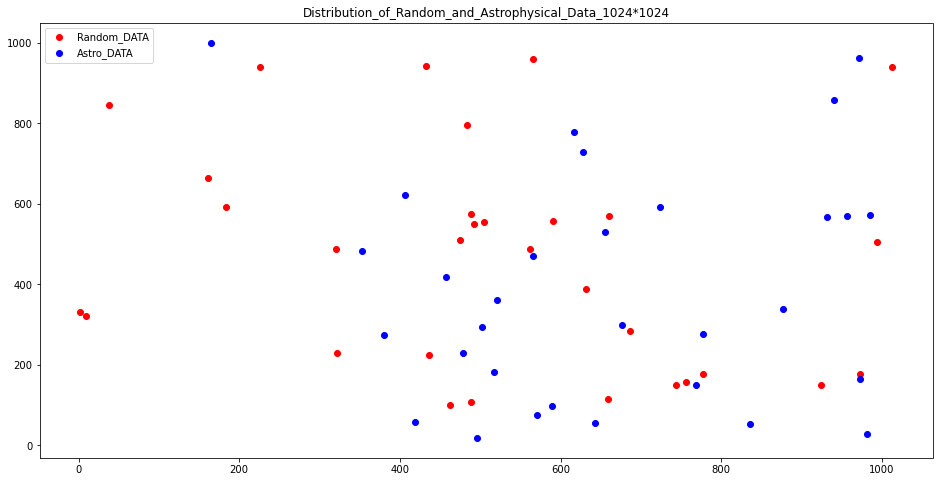

In [14]:
plt.scatter(XG1,YG1,c='r',label='Random_DATA')
plt.scatter(XG2,YG2,c='b',label='Astro_DATA')
plt.title("Distribution_of_Random_and_Astrophysical_Data_1024*1024")
plt.legend()
plt.draw()
plt.savefig('1024*1024_visualization_Galaxy.pdf')

### Creation of Distance Functions

#### Distance between Data and Random (D(d-r))

In [15]:
def RDdist(x1,y1,x2,y2):
    subsX=[]
    subsY=[]
    RD_Dist=[]
    c1,c2=0,0
    #substraction on x axis:
    for i in x1:
        for j in x2:
            subsX.append(i-j)
    #substraction on y axis:
    for i in y1:
        for j in y2:
            subsY.append(i-j)
    #distances between Data and Random coordinates: 
    for i in subsX:
        c1 += 1
        c2 =0
        for j in subsY:
            c2 +=1
            if c1 == c2:
                RD_Dist.append(np.sqrt((i**2)+(j**2)))
    return RD_Dist

#### Disatnces between Same_coordinates (D(d-d) or D(r-r))

In [16]:
def DDRRdist(x1,y1):
    subsX=[]
    subsY=[]
    DDRR_Dist=[]
    c1,c2=0,0
    #substraction on x axis:
    for i in x1:
        c1 += 1
        c2 = 0
        for j in x1:
            c2 += 1
            if c1 != c2:
                subsX.append(i-j)
    #substraction on y axis:
    for i in y1:
        c1 += 1
        c2 = 0
        for j in y1:
            c2 += 1
            if c1 != c2:
                subsY.append(i-j)
    #distances between Data and Random coordinates: 
    for i in subsX:
        c1 += 1
        c2 =0
        for j in subsY:
            c2 +=1
            if c1 == c2:
                DDRR_Dist.append(np.sqrt((i**2)+(j**2)))
    return DDRR_Dist

### Calculation and visualization

### Complete

In [17]:
DR = RDdist(X1,Y1,X2,Y2)
DD = DDRRdist(X1,Y1)
RR = DDRRdist(X2,Y2)

### Superposed Histograms

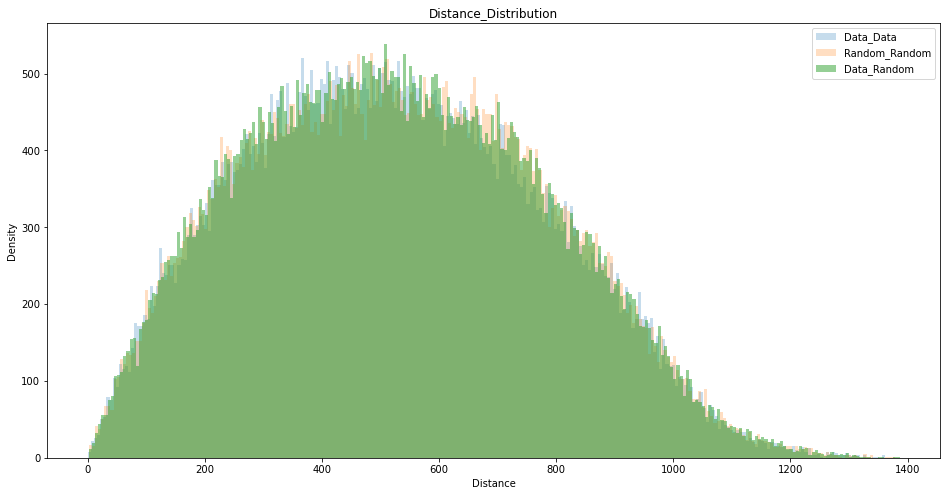

In [18]:
plt.hist(DD,bins=NP,alpha=0.25,label='Data_Data')
plt.hist(RR,bins=NP,alpha=0.25,label='Random_Random')
plt.hist(DR,bins=NP,alpha=0.5,label='Data_Random')
plt.legend(loc='upper right')
plt.title('Distance_Distribution')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.draw()
plt.savefig('Histograms_superposed.pdf')

### Stars

In [19]:
DRS = RDdist(XS1,YS1,XS2,YS2)
DDS = DDRRdist(XS1,YS1)
RRS = DDRRdist(XS2,YS2)

### Superposed Histograms for Stars

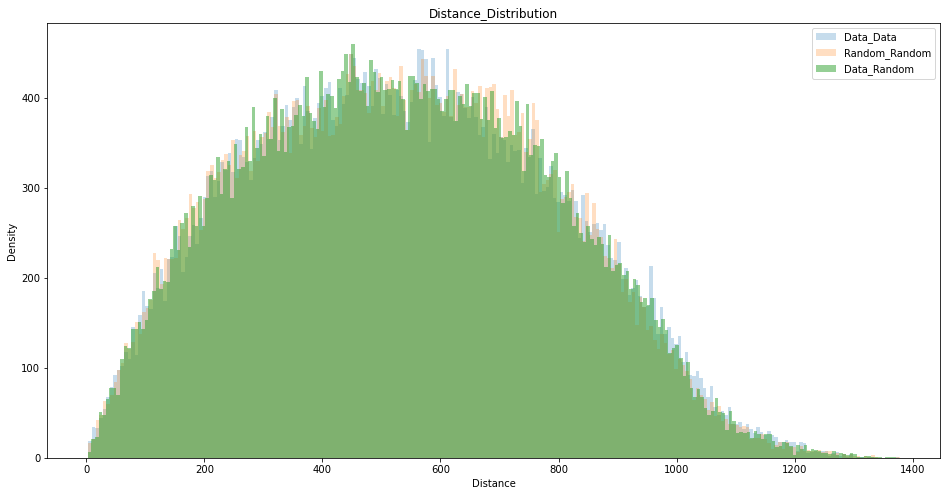

In [20]:
plt.hist(DDS,bins=NPS,alpha=0.25,label='Data_Data')
plt.hist(RRS,bins=NPS,alpha=0.25,label='Random_Random')
plt.hist(DRS,bins=NPS,alpha=0.5,label='Data_Random')
plt.legend(loc='upper right')
plt.title('Distance_Distribution')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.draw()
plt.savefig('Histograms_superposed_stars.pdf')

### Galaxies 

In [21]:
DRG = RDdist(XG1,YG1,XG2,YG2)
DDG = DDRRdist(XG1,YG1)
RRG = DDRRdist(XG2,YG2)

### Superposed Histograms for Galaxies

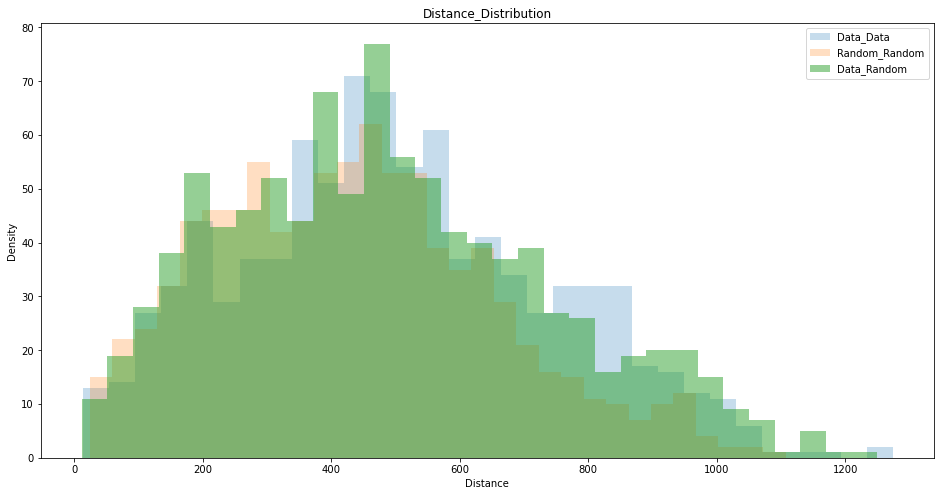

In [22]:
plt.hist(DDG,bins=NPG,alpha=0.25,label='Data_Data')
plt.hist(RRG,bins=NPG,alpha=0.25,label='Random_Random')
plt.hist(DRG,bins=NPG,alpha=0.5,label='Data_Random')
plt.legend(loc='upper right')
plt.title('Distance_Distribution')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.draw()
plt.savefig('Histograms_superposed_galaxies.pdf')

### Angular_two_point_correlation_function_full_data

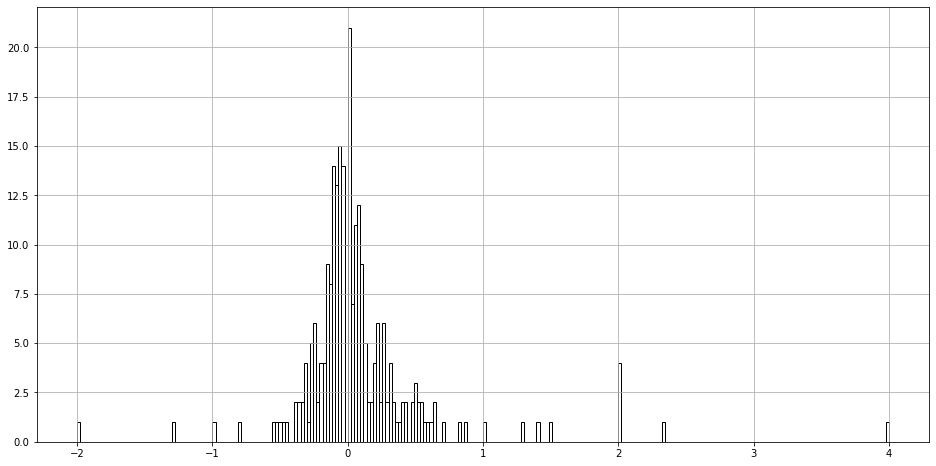

In [23]:
#def An_Corre_func_Hist(dd,rr,dr):
Total_hist = []
RD_hist, Xedge = np.histogram(DR,bins=NP)
DD_hist, Xedge = np.histogram(DD,bins=NP)
RR_hist, Xedge = np.histogram(RR,bins=NP)
cc1 , cc2, cc3 = 0, 0, 0
for i in DD_hist:
    cc1 += 1
    cc2 = 0
    cc3 = 0
    for j in RR_hist:
        cc2 += 1
        cc3 = 0
        for k in RD_hist:
            cc3 += 1
            if ((cc1 == cc2) and (cc1 == cc3)):
                if (j!=0):
                    Total_hist.append((i+j-(2*k))/j)

plt.hist(Total_hist,bins=NP, fill=False)
plt.grid()
plt.draw()
plt.savefig('Histogram_Total_Angular_two_point_correlation_function.pdf')

### Angular_two_point_correlation_function_Stars

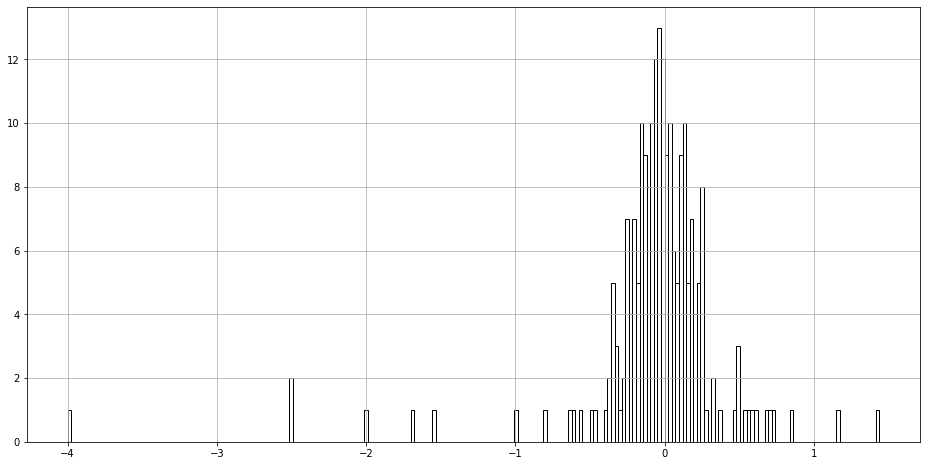

In [24]:
#def An_Corre_func_Hist(dd,rr,dr):
Total_hist_S = []
RDS_hist, XedgeS = np.histogram(DRS,bins=NPS)
DDS_hist, XedgeS = np.histogram(DDS,bins=NPS)
RRS_hist, XedgeS = np.histogram(RRS,bins=NPS)
cc1 , cc2, cc3 = 0, 0, 0
for i in DDS_hist:
    cc1 += 1
    cc2 = 0
    cc3 = 0
    for j in RRS_hist:
        cc2 += 1
        cc3 = 0
        for k in RDS_hist:
            cc3 += 1
            if ((cc1 == cc2) and (cc1 == cc3)):
                if (j!=0):
                    Total_hist_S.append((i+j-(2*k))/j)

plt.hist(Total_hist_S,bins=NPS, fill=False)
plt.grid()
plt.draw()
plt.savefig('Histogram_Total_Angular_two_point_correlation_function_for_Stars.pdf')

### Angular_two_point_correlation_function_Galaxies

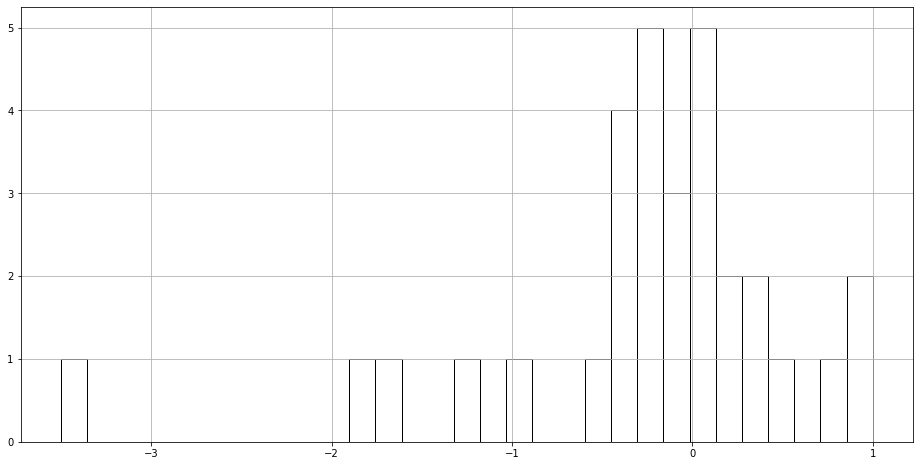

In [25]:
#def An_Corre_func_Hist(dd,rr,dr):
Total_hist_G = []
RDG_hist, XedgeG = np.histogram(DRG,bins=NPG)
DDG_hist, XedgeG = np.histogram(DDG,bins=NPG)
RRG_hist, XedgeG = np.histogram(RRG,bins=NPG)
cc1 , cc2, cc3 = 0, 0, 0
for i in DDG_hist:
    cc1 += 1
    cc2 = 0
    cc3 = 0
    for j in RRG_hist:
        cc2 += 1
        cc3 = 0
        for k in RDG_hist:
            cc3 += 1
            if ((cc1 == cc2) and (cc1 == cc3)):
                if (j!=0):
                    Total_hist_G.append((i+j-(2*k))/j)

plt.hist(Total_hist_G,bins=NPG, fill=False)
plt.grid()
plt.draw()
plt.savefig('Histogram_Total_Angular_two_point_correlation_function_for_Galaxies.pdf')

### Mean, Standard_deviation

### Full data

In [38]:
M,S = np.mean(Total_hist),np.std(Total_hist)

### Stars

In [39]:
SM ,SS = np.mean(Total_hist),np.std(Total_hist)

### Galaxies

In [40]:
GM, GS = np.mean(Total_hist),np.std(Total_hist)

### Absolute_Angular_two_point_correlation_function_full_data

In [29]:
Total_hist_ABS = [abs(i) for i in Total_hist]

### Visualization

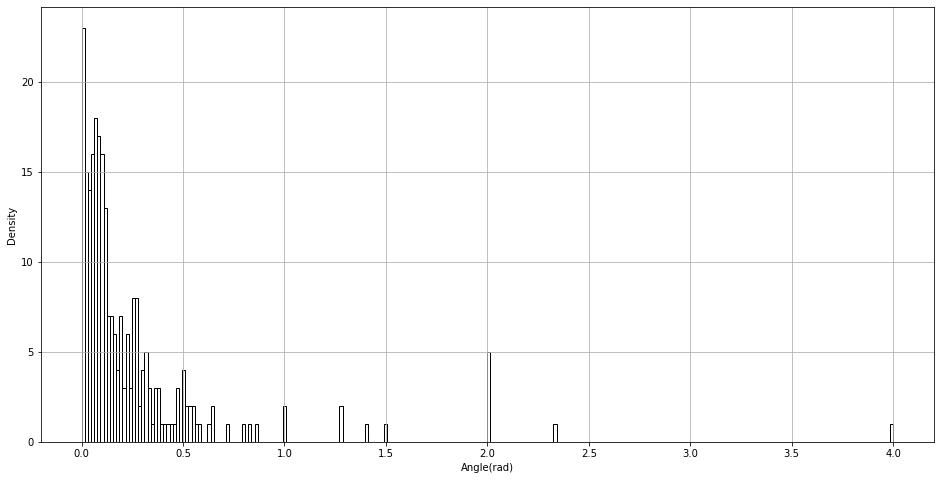

In [30]:
plt.hist(Total_hist_ABS,bins=NP, fill=False)
plt.xlabel('Angle(rad)')
plt.ylabel('Density')
plt.grid()
plt.draw()
plt.savefig('Histogram_Angulartwopointcorrelation_ABS.pdf')

### Absolute_Angular_two_point_correlation_function_Stars

In [31]:
Total_hist_S_ABS = [abs(i) for i in Total_hist_S]

### Visualization

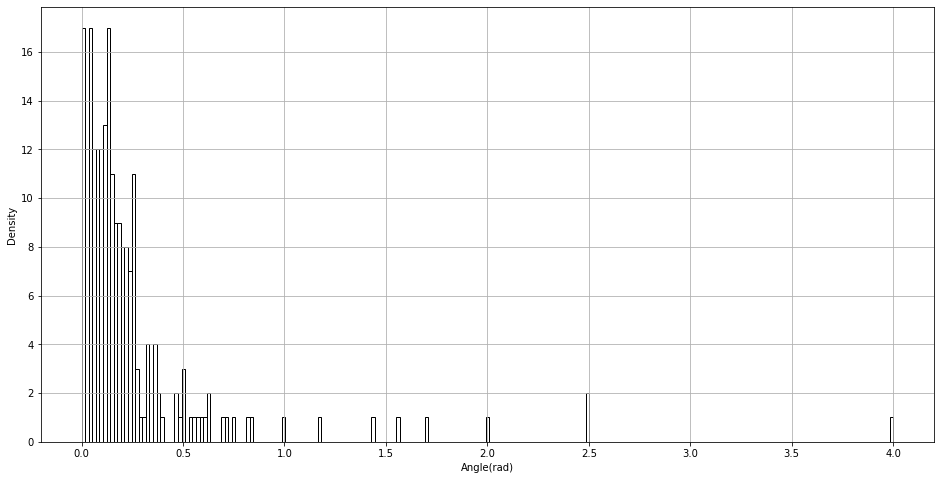

In [32]:
plt.hist(Total_hist_S_ABS,bins=NPS, fill=False)
plt.xlabel('Angle(rad)')
plt.ylabel('Density')
plt.grid()
plt.draw()
plt.savefig('Histogram_Angulartwopointcorrelation_ABS_for_Stars.pdf')

### Absolute_Angular_two_point_correlation_function_Galaxies

In [33]:
Total_hist_G_ABS = [abs(i) for i in Total_hist_G]

### Visualization

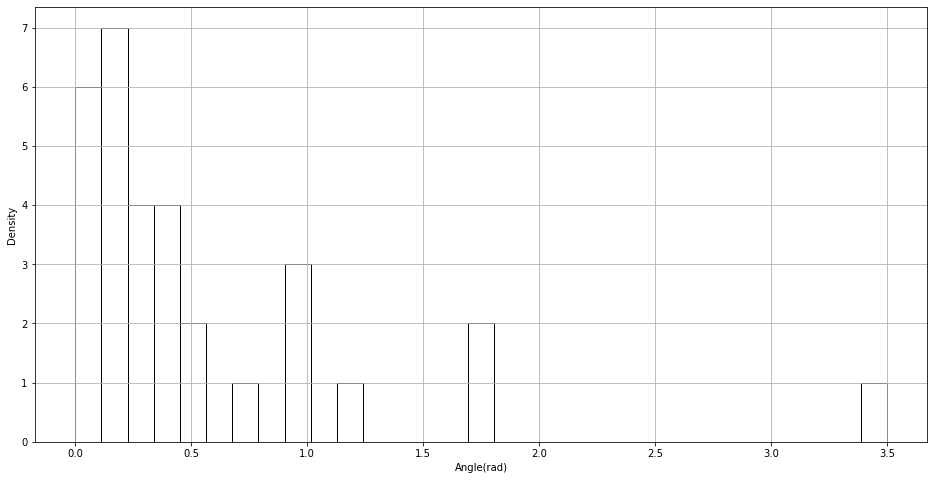

In [34]:
plt.hist(Total_hist_G_ABS,bins=NPG, fill=False)
plt.xlabel('Angle(rad)')
plt.ylabel('Density')
plt.grid()
plt.draw()
plt.savefig('Histogram_Angulartwopointcorrelation_ABS_for_Galaxies.pdf')

### Mean, Standard deviation

#### Full_data

In [41]:
ABS_M, ABS_S = np.mean(Total_hist_ABS),np.std(Total_hist_ABS)

#### Stars

In [42]:
ABS_SM, ABS_SS = np.mean(Total_hist_S_ABS),np.std(Total_hist_S_ABS)

#### Galaxies

In [43]:
ABS_GM, ABS_GS = np.mean(Total_hist_G_ABS),np.std(Total_hist_G_ABS)

In [94]:
RES=["ABSOLUTE TWO Point angular correlation function All data :\n","\n",
     "Full_Mean:",ABS_M,"        Full_Standard_Deviation:",ABS_S,"\n",
     "Stars_Mean:",ABS_SM,"      Stars_Standard_Deviation:",ABS_SS, "\n",
     "Galaxies_Mean:",ABS_GM,"   Galaxies_Standard_Deviation:",ABS_GS, "\n", "\n", "\n",
     "ORDINARY TWO Point angular correlation function All data:\n","\n",
     "Full_Mean:",M,"       Full_Standard_Deviation:",S, "\n",
     "Stars_Mean:",SM,"      Stars_Standard_Deviation:",SS, "\n",
     "Galaxies_Mean:",GM,"   Galaxies_Standard_Deviation:",GS ,"\n"]

In [95]:
Result = open("Results.txt",'w')
for i in RES:
    Result.write(str(i))
Result.close()

# We had run the previous code 19 times

### Extracting Data from Result.txt Files:

In [5]:
Number_of_Times= [i for i in range(1,20)]
Total_Std_hist=[0.446715879424833,0.39570794635384876,0.566740371900381,0.3819033191708908,0.4209950307398872,0.445885859004162,0.48425892245456864,0.4360396396331224,0.36384177813995405,0.46680037565168486,0.4021768289887495,0.8208605608097201,0.616211223827725,0.4695642754174025,0.28960042705877,0.4809582690892273,0.5604259860348734,0.41512608766092207,0.3100496942852065]
Stars_Std_hist=[0.3903675875246,0.4762697660277469,0.4514289383598142,0.3949590084609015,0.3208057569793171,0.417604881489661,0.5026492918231493,0.3466341759747653,0.37798662351014345,0.43476605539877444,0.3086336552482156,0.3844263457802367,0.4527321644196628,0.3985728940371774,0.4164853700855077,0.4351331662221394,0.3698011634062654,0.4582661822531075,0.38792431824665924]
Galaxies_Std_hist=[0.6202785470291529,0.7038201207230281,0.9059862280814963,1.1034122476133104,0.47980680267507625,0.781326696854516,0.44678094236581645,0.4112886490959973,0.5785587050194914,0.353342921929238,0.6617217864135273,0.7260956829104465,0.4755805038917889,0.6542420958759484,0.8367134217810784,0.5928235855951426,0.5229951293606696,0.7848226645249823,0.41957667712774416]
Total_Mean_hist=[0.28927677191396867,0.3298597069128274,0.27446727452251496,0.2554504875137826,0.2605489540540603,0.2843205769357354,0.26762973168241044,0.28179849014064884,0.22067053618864593,0.27664388895663594,0.2506822545370719,0.34064089967225913,0.3250425771853553,0.2666683191393442,0.20219134940375405,0.3326836081765062,0.3501460398132735,0.265737446934609,0.23017541856444337]
Stars_Mean_hist=[0.25255123879897673,0.3009029142125835,0.28187645643267867,0.2685779344445992,0.26311983321726984,0.2938484382095898,0.3017999874394887,0.2371154107601975,0.2560071713359439,0.24077839156108205,0.2319980710790171,0.26049784865973497,0.23908776117864253,0.23460442888954813,0.32880509405114833,0.26853292264820283,0.25381459222728997,0.25453178246910424,0.2538065691520102]
Galaxies_Mean_hist=[0.5824369981392975,0.7468513080739029,0.7245494963663682,0.9908493587924502,0.5701213015548535,0.5673313801351904,0.5159954744026761,0.5219267781183363,0.6018660797527249,0.39380640400386824,0.6274991276882772,0.600159538132886,0.5979188145204716,0.7416099971690316,0.7037824153869325,0.5996153469544401,0.6071642875649206,0.6679327707399317,0.5447260475763465]

##

### Visualization of Results:

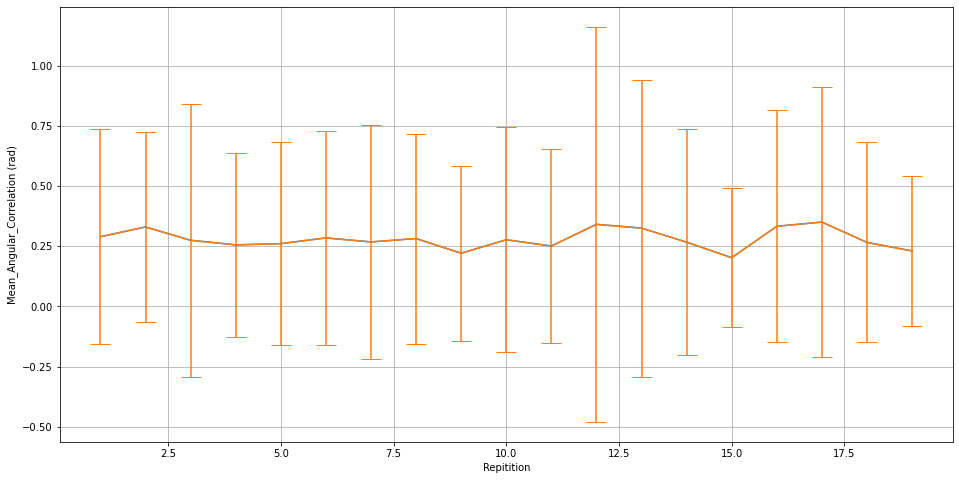

In [5]:
plt.plot(Number_of_Times,Total_Mean_hist)
plt.errorbar(Number_of_Times, Total_Mean_hist, yerr=Total_Std_hist, capsize=10)
plt.xlabel('Repitition')
plt.ylabel('Mean_Angular_Correlation (rad)')
plt.grid()
plt.draw()
plt.savefig('Final_Result_All.pdf')

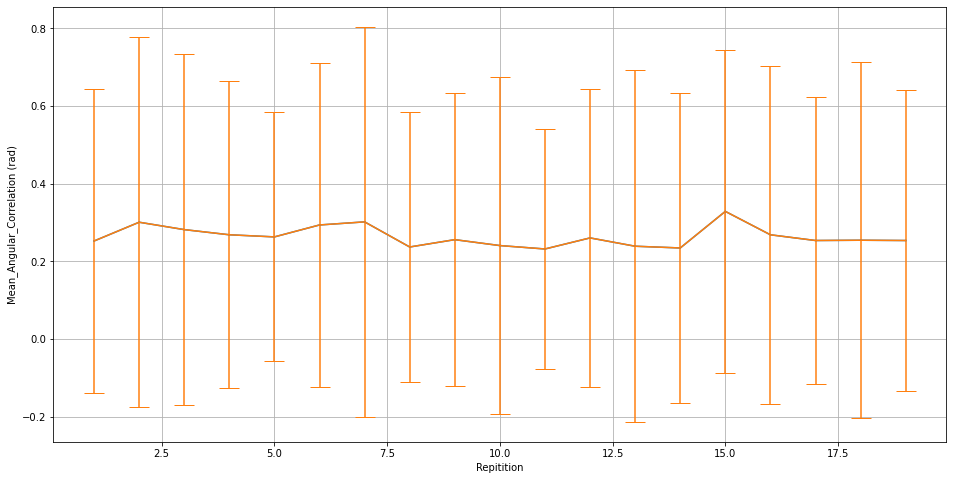

In [6]:
plt.plot(Number_of_Times,Stars_Mean_hist)
plt.errorbar(Number_of_Times, Stars_Mean_hist, yerr=Stars_Std_hist, capsize=10)
plt.xlabel('Repitition')
plt.ylabel('Mean_Angular_Correlation (rad)')
plt.grid()
plt.draw()
plt.savefig('Final_Result_Stars.pdf')

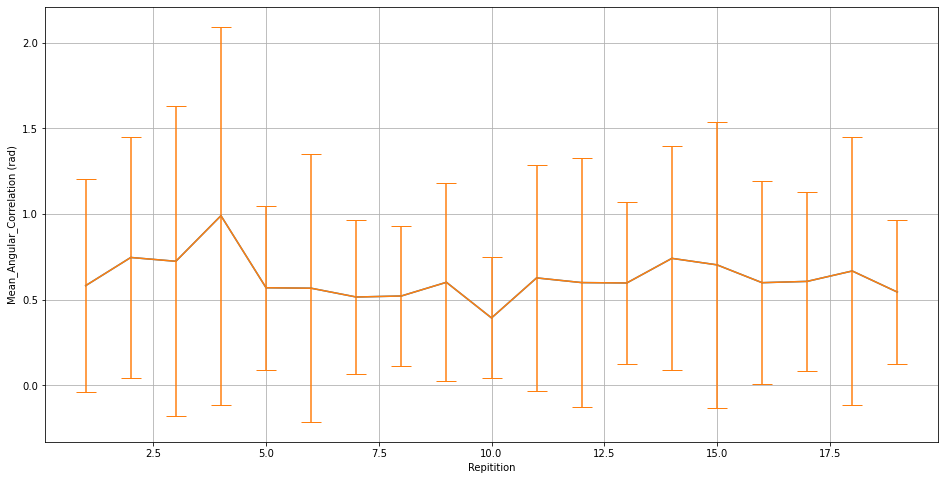

In [7]:
plt.plot(Number_of_Times,Galaxies_Mean_hist)
plt.errorbar(Number_of_Times, Galaxies_Mean_hist, yerr=Galaxies_Std_hist, capsize=10)
plt.xlabel('Repitition')
plt.ylabel('Mean_Angular_Correlation (rad)')
plt.grid()
plt.draw()
plt.savefig('Final_Result_Galaxies.pdf')

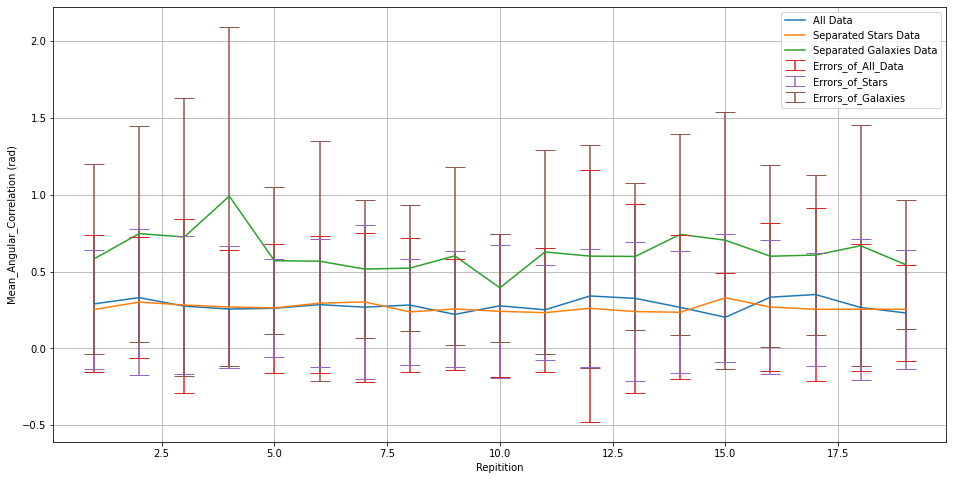

In [6]:
plt.plot(Number_of_Times,Total_Mean_hist,label='All Data')
plt.plot(Number_of_Times,Stars_Mean_hist,label='Separated Stars Data')
plt.plot(Number_of_Times,Galaxies_Mean_hist,label='Separated Galaxies Data')
plt.errorbar(Number_of_Times, Total_Mean_hist, yerr=Total_Std_hist, capsize=10,label='Errors_of_All_Data',fmt='none')
plt.errorbar(Number_of_Times, Stars_Mean_hist, yerr=Stars_Std_hist, capsize=10,label='Errors_of_Stars',fmt='none')
plt.errorbar(Number_of_Times, Galaxies_Mean_hist, yerr=Galaxies_Std_hist, capsize=10,label='Errors_of_Galaxies',fmt='none')
plt.xlabel('Repitition')
plt.ylabel('Mean_Angular_Correlation (rad)')
plt.grid()
plt.legend()
plt.draw()
plt.savefig('Final_Result_Ultimate.pdf')